Epoch [1/20], Training Loss: 1.7502, Training Accuracy: 0.5591, Test Loss: 0.7313, Test Accuracy: 0.7875
Epoch [2/20], Training Loss: 0.5870, Training Accuracy: 0.8188, Test Loss: 0.5345, Test Accuracy: 0.8309
Epoch [3/20], Training Loss: 0.4681, Training Accuracy: 0.8469, Test Loss: 0.4711, Test Accuracy: 0.8459
Epoch [4/20], Training Loss: 0.4163, Training Accuracy: 0.8594, Test Loss: 0.4362, Test Accuracy: 0.8555
Epoch [5/20], Training Loss: 0.3821, Training Accuracy: 0.8699, Test Loss: 0.4195, Test Accuracy: 0.8622
Epoch [6/20], Training Loss: 0.3578, Training Accuracy: 0.8763, Test Loss: 0.4072, Test Accuracy: 0.8599
Epoch [7/20], Training Loss: 0.3393, Training Accuracy: 0.8811, Test Loss: 0.3891, Test Accuracy: 0.8661
Epoch [8/20], Training Loss: 0.3240, Training Accuracy: 0.8859, Test Loss: 0.3851, Test Accuracy: 0.8688
Epoch [9/20], Training Loss: 0.3093, Training Accuracy: 0.8899, Test Loss: 0.3821, Test Accuracy: 0.8710
Epoch [10/20], Training Loss: 0.2972, Training Accuracy

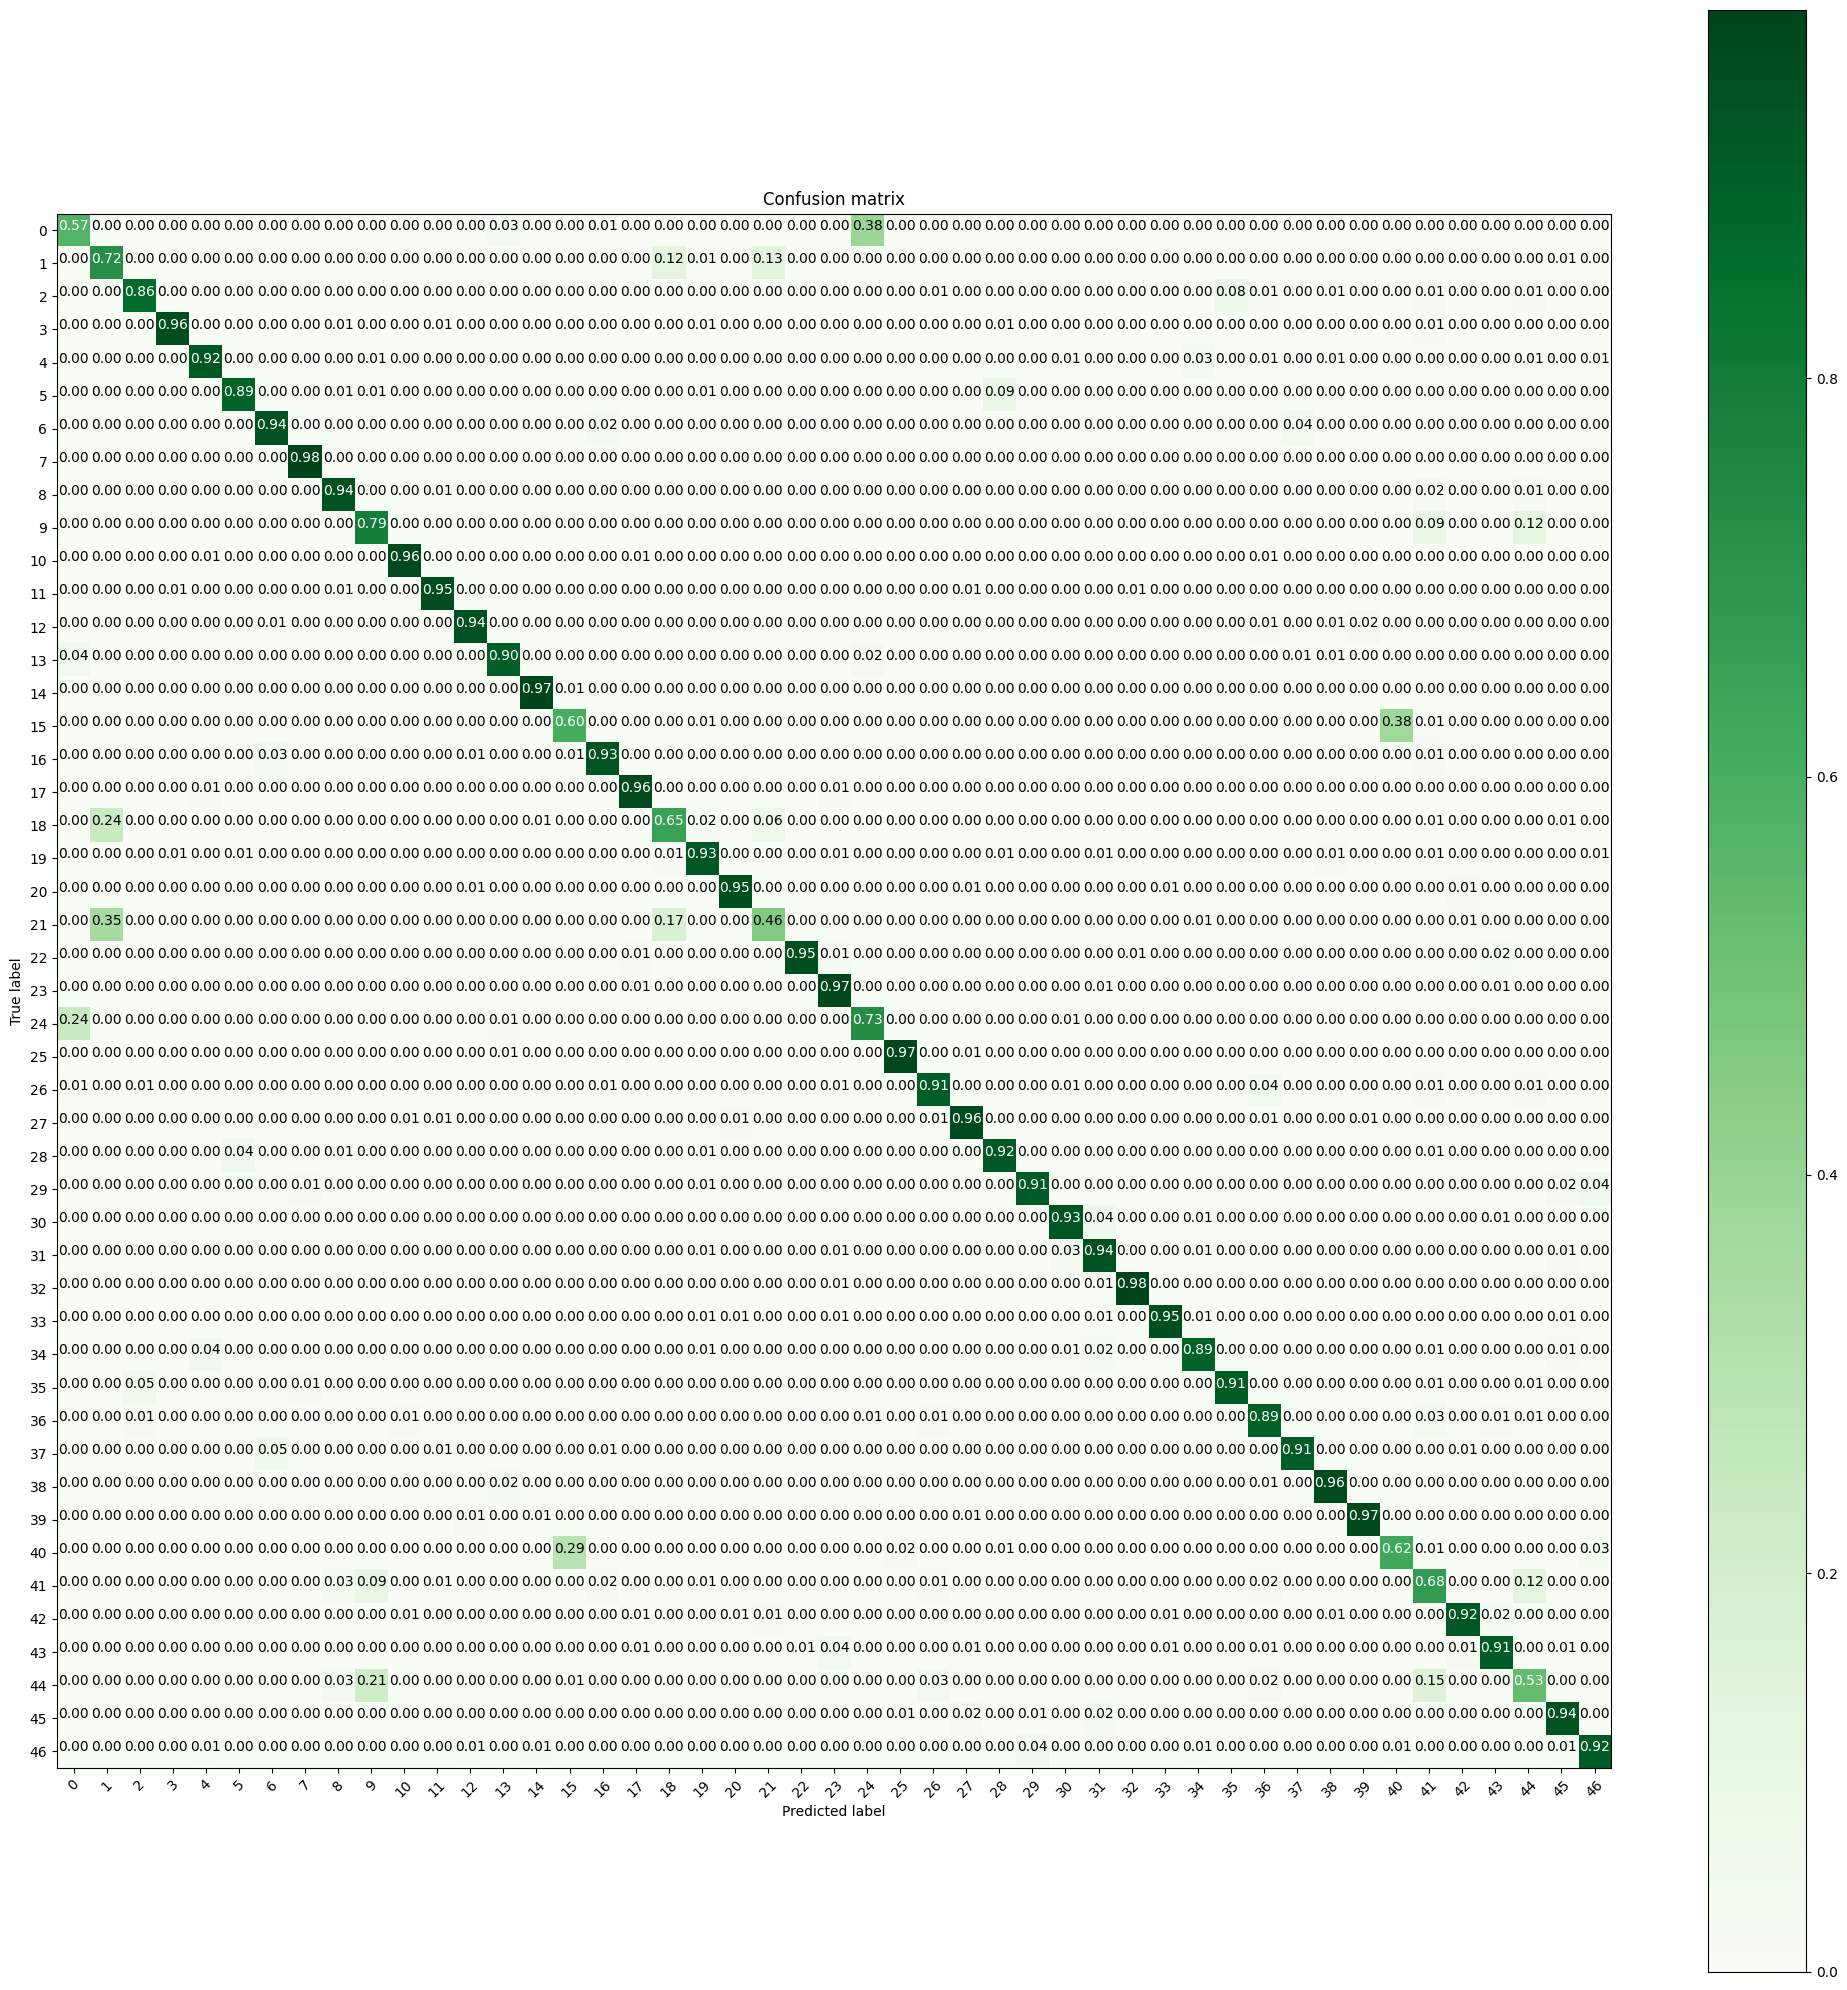

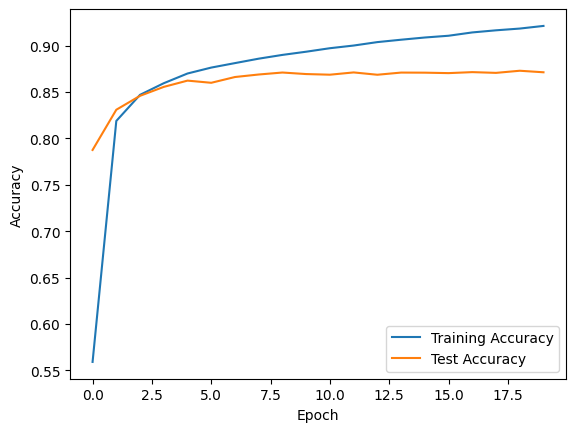

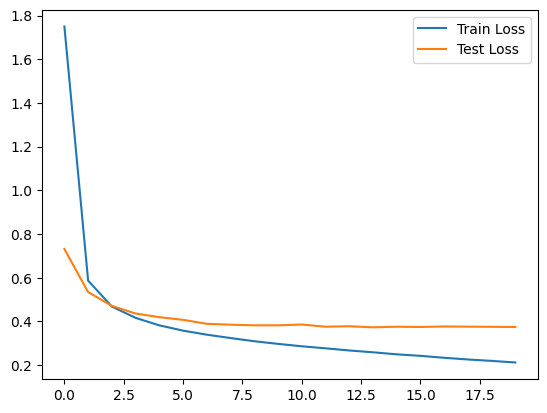

In [ ]:
# Vijeth Balasubramaniam - 201664207
# Manoj 
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision.datasets import EMNIST
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import torch.nn.functional as F
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score

# Define the datasets and dataloaders
train_dataset = EMNIST(root='./data', split='balanced', train=True, download=True, transform=transform)
test_dataset = EMNIST(root='./data', split='balanced', train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)
# Define hyperparameters
batch_size = 128
learning_rate = 0.001
num_epochs = 20

# Define CNN model
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        # Convolutional layers
        self.conv1 = nn.Conv2d(3, 16, kernel_size=5, stride=1, padding=2)
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=5, stride=1, padding=2)
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.sigmoid = nn.Sigmoid()
        # Fully connected layers
        self.fc1 = nn.Linear(1568, 128)
        self.fc2 = nn.Linear(128, 47)
        
        # Activation function
        #self.relu = nn.ReLU()
        
    def forward(self, x):
        x = self.conv1(x)
        x = self.sigmoid(x)
        x = self.pool1(x)
        
        x = self.conv2(x)
        x = self.sigmoid(x)
        x = self.pool2(x)
        
        # Reshape the output of the convolutional layers
        x = x.view(x.size(0), -1)
        
        x = self.fc1(x)
        x = self.sigmoid(x)
        
        x = self.fc2(x)
        return x

import numpy as np
import itertools
from sklearn.metrics import confusion_matrix

# Define function to plot confusion matrix
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.figure(figsize=(20, 20))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
 
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


# Load EMNIST dataset
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=3),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
train_dataset = EMNIST(root='./data', split='balanced', train=True, download=True, transform=transform)
test_dataset = EMNIST(root='./data', split='balanced', train=False, download=True, transform=transform)

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Initialize models
cnn_model = CNNModel()

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
cnn_optimizer = optim.Adam(cnn_model.parameters(), lr=learning_rate)

# Train CNN model
train_losses = []
train_accs = []
test_losses = []
test_accs = []
best_acc = 0.0

for epoch in range(num_epochs):
    cnn_model.train()
    train_loss = 0.0
    train_correct = 0
    train_total = 0
    targets=[]
    for i, (images, labels) in enumerate(train_loader):
        images = images
        labels = labels

        # Forward pass
        outputs = cnn_model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        cnn_optimizer.zero_grad()
        loss.backward()
        cnn_optimizer.step()
        
        # Calculate training loss and accuracy
        train_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        train_total += labels.size(0)
        train_correct += (predicted == labels).sum().item()
        total_steps = len(train_loader) * batch_size

    # Calculate training accuracy and add to list
    train_acc = train_correct / train_total
    train_accs.append(train_acc)
    
    # Calculate test loss and accuracy
    cnn_model.eval()
    test_loss = 0.0
    test_correct = 0
    test_total = 0
    test_predictions = []
    test_targets = []
    test_acc = []
    preds = outputs.argmax(dim=1)

    with torch.no_grad():
        
        for images, labels in test_loader:
            images = images
            labels = labels
            
            # Forward pass
            outputs = cnn_model(images)
            loss = criterion(outputs, labels)
            
            # Calculate test loss and accuracy
            test_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            acc = accuracy_score(labels.cpu(), predicted.cpu())
            test_acc.append(acc)
            test_targets.extend(labels.numpy())
            test_predictions.extend(predicted.numpy())
            test_predictions += predicted.tolist()
            test_targets += labels.tolist()
            test_total += labels.size(0)
            test_correct += (predicted == labels).sum().item()

    # Calculate test accuracy and add to list
    test_acc = test_correct / test_total
    test_accs.append(test_acc)
    test_losses.append(test_loss / len(test_loader))
    train_losses.append(train_loss / len(train_loader))
    conf_mat = confusion_matrix(test_targets, test_predictions)
    precision = precision_score(test_targets, test_predictions, average = 'macro')
    recall = recall_score(test_targets, test_predictions, average = 'macro')
    f1 = f1_score(test_targets, test_predictions, average = 'macro')

    # Save the model with the best test accuracy
    if test_acc > best_acc:
        torch.save(cnn_model.state_dict(), 'best_cnn_model.pth')
        best_acc = test_acc
    
    # Print the training and test losses and accuracies for this epoch
    print(f"Epoch [{epoch+1}/{num_epochs}], Training Loss: {train_loss/len(train_loader):.4f}, Training Accuracy: {train_acc:.4f}, Test Loss: {test_loss/len(test_loader):.4f}, Test Accuracy: {test_acc:.4f}")
print(f'Precision: {precision:.4f} \nRecall: {recall:.4f}\nF1 score: {f1:.4f}\n')
test_acc = np.mean(test_acc)
print(f"Overall Accuracy: {test_acc}") 

# Plot confusion matrix
classes = [str(i) for i in range(47)]
plot_confusion_matrix(conf_mat, classes=classes, normalize=True, cmap=plt.cm.Greens)
plt.show()

# Plot the training and test accuracies
plt.plot(train_accs, label='Training Accuracy')
plt.plot(test_accs, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot the loss and accuracy curves
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show() 

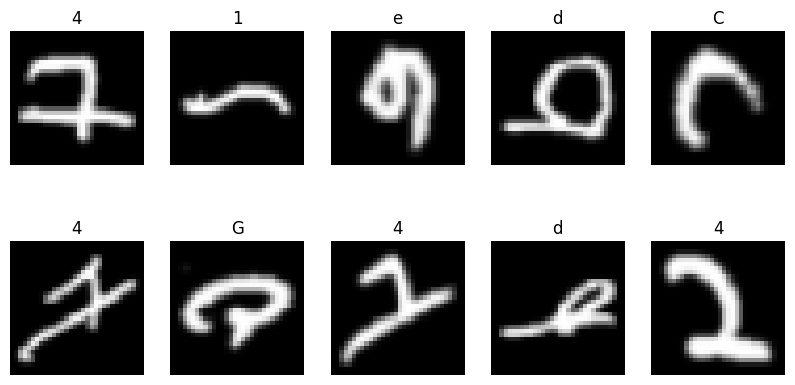

Epoch [1/20], Train Loss: 1.7894, Train Acc: 0.4903, Test Loss: 1.0034, Test Acc: 0.6940
Epoch [2/20], Train Loss: 0.8303, Train Acc: 0.7370, Test Loss: 0.7363, Test Acc: 0.7703
Epoch [3/20], Train Loss: 0.6558, Train Acc: 0.7870, Test Loss: 0.6315, Test Acc: 0.7990
Epoch [4/20], Train Loss: 0.5816, Train Acc: 0.8063, Test Loss: 0.5979, Test Acc: 0.8065
Epoch [5/20], Train Loss: 0.5303, Train Acc: 0.8212, Test Loss: 0.6004, Test Acc: 0.8055
Epoch [6/20], Train Loss: 0.4998, Train Acc: 0.8295, Test Loss: 0.5517, Test Acc: 0.8183
Epoch [7/20], Train Loss: 0.4711, Train Acc: 0.8364, Test Loss: 0.5175, Test Acc: 0.8293
Epoch [8/20], Train Loss: 0.4482, Train Acc: 0.8439, Test Loss: 0.5249, Test Acc: 0.8237
Epoch [9/20], Train Loss: 0.4394, Train Acc: 0.8454, Test Loss: 0.5078, Test Acc: 0.8319
Epoch [10/20], Train Loss: 0.4245, Train Acc: 0.8504, Test Loss: 0.5031, Test Acc: 0.8331
Epoch [11/20], Train Loss: 0.4060, Train Acc: 0.8552, Test Loss: 0.4828, Test Acc: 0.8391
Epoch [12/20], Trai

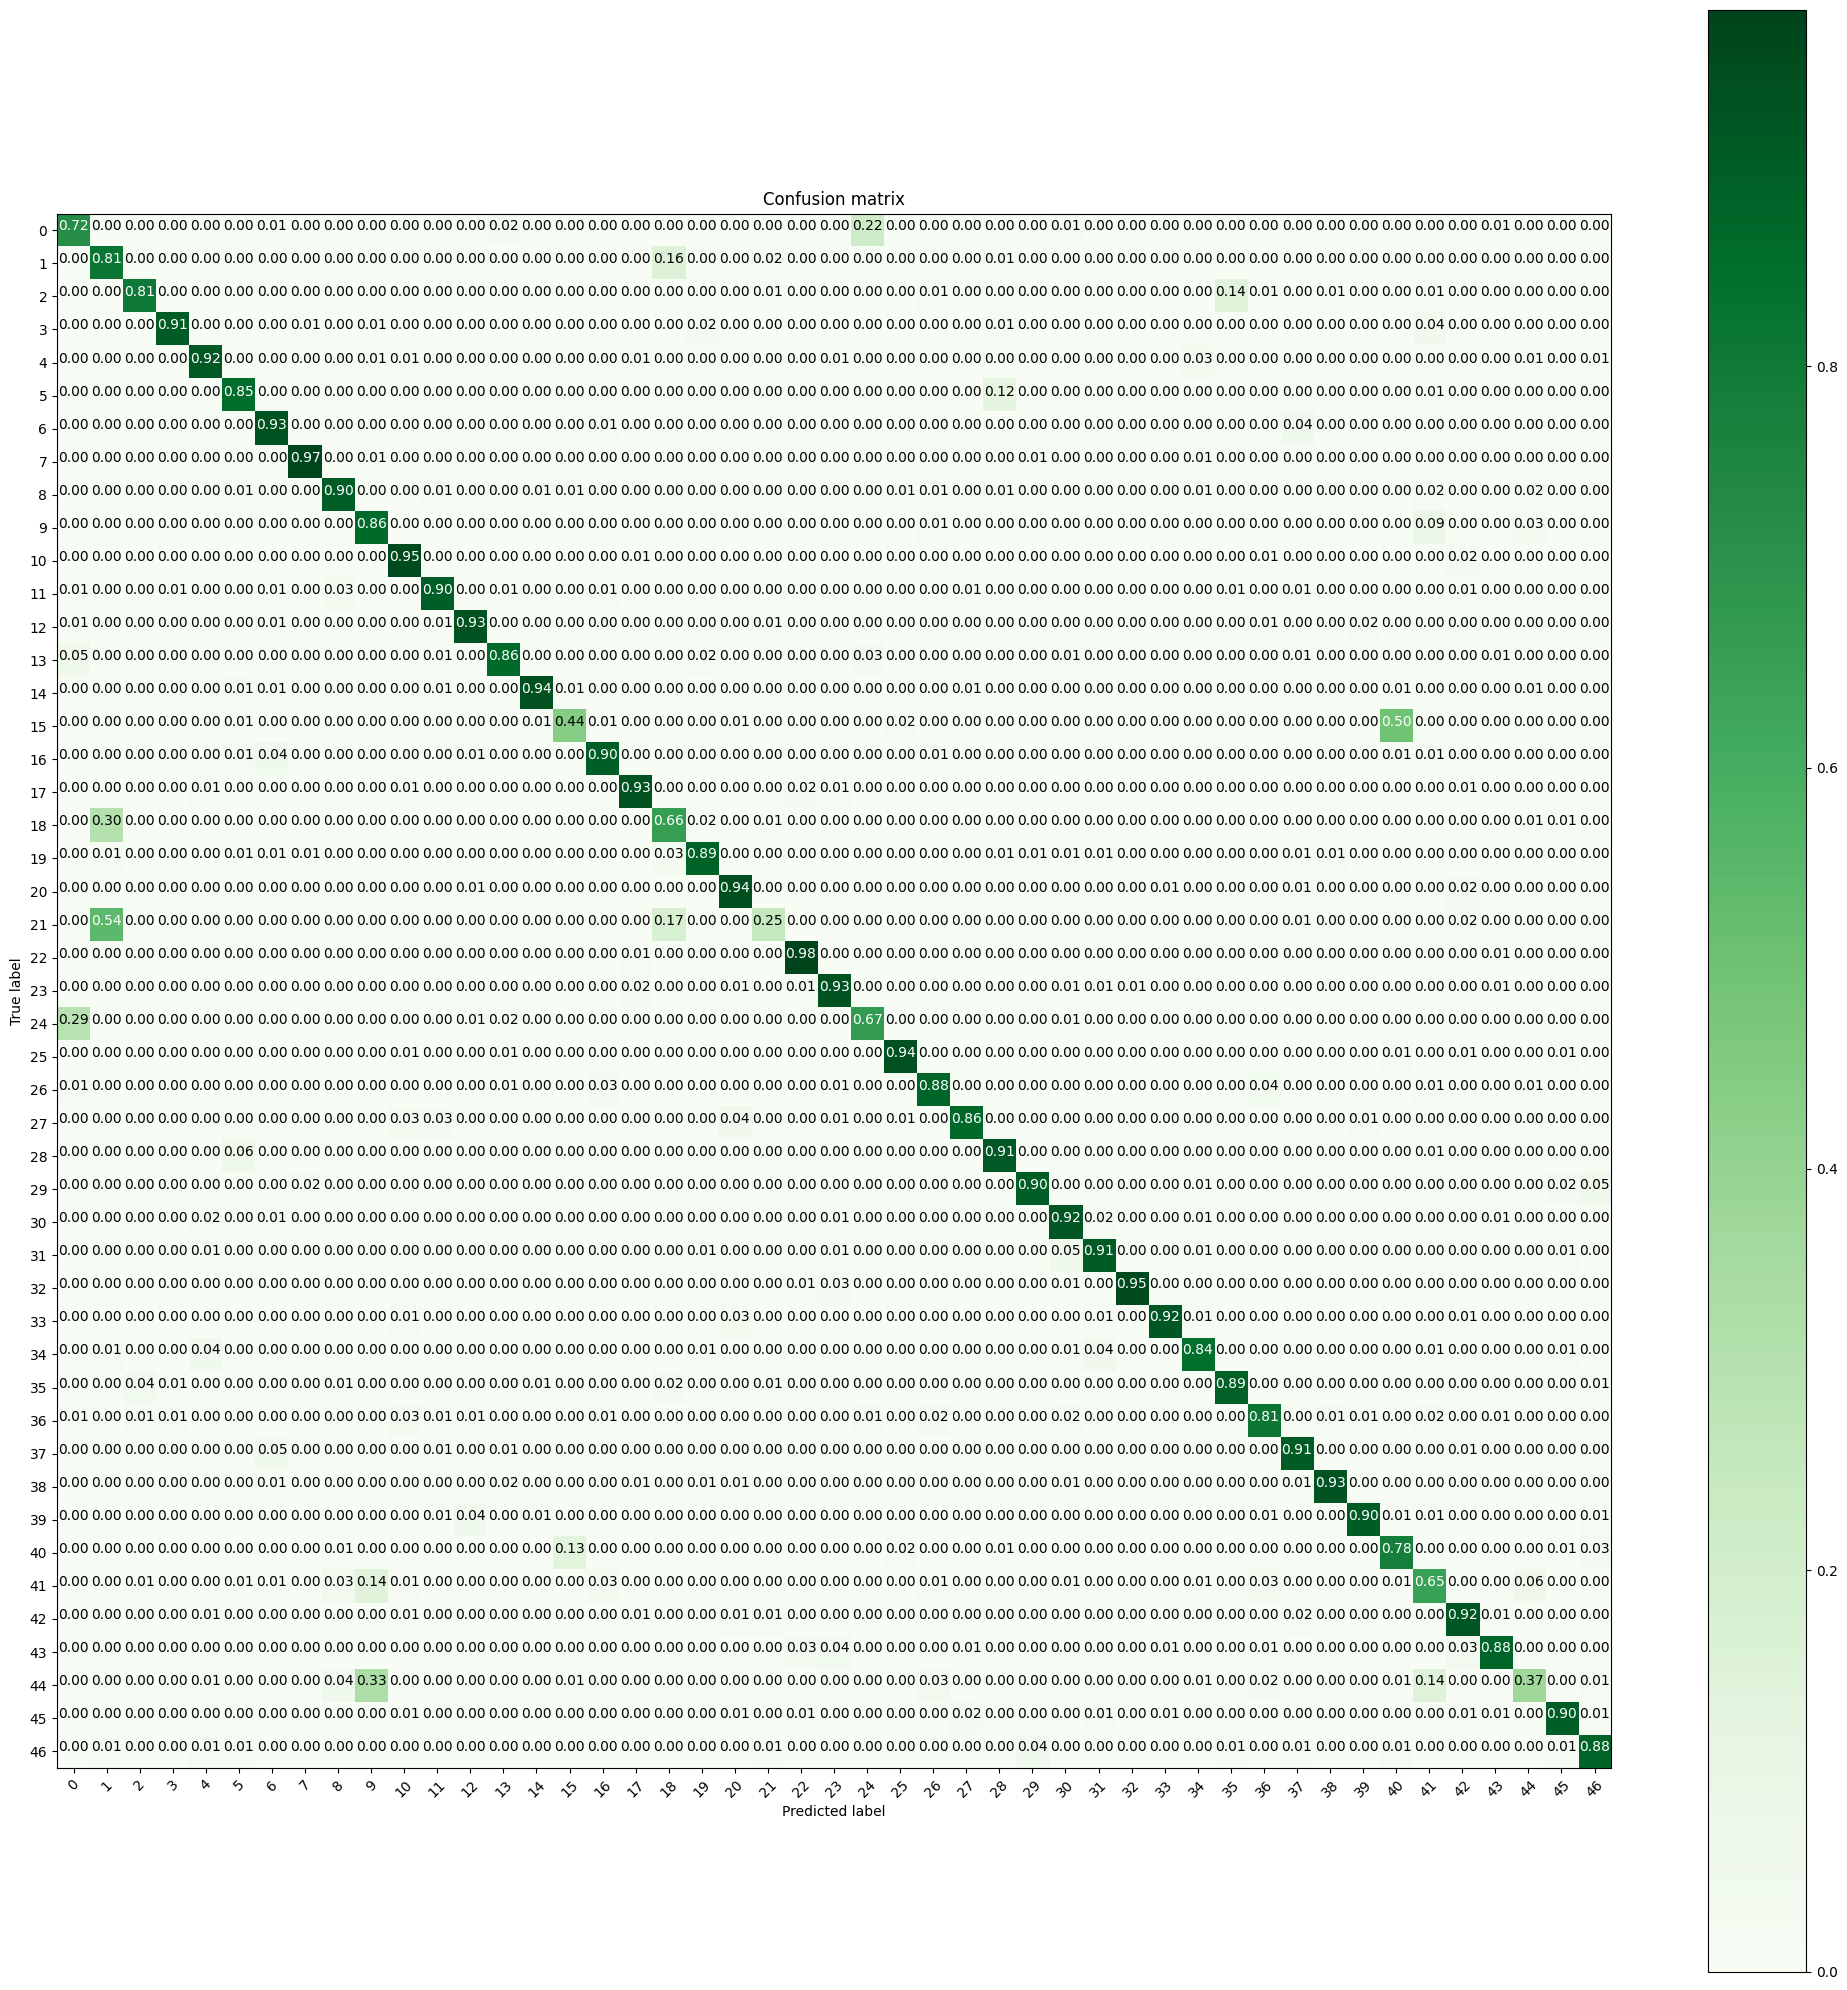

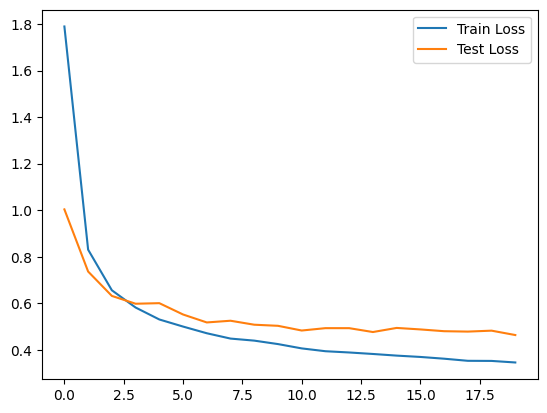

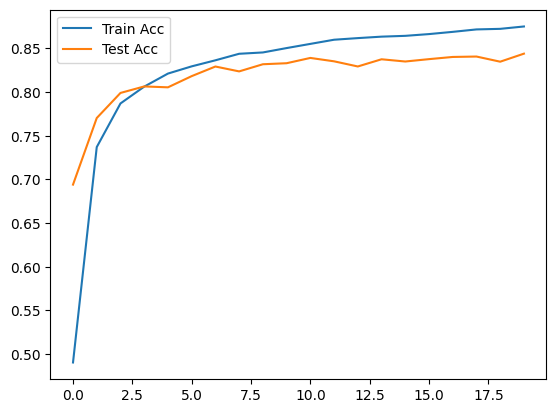

In [12]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision.datasets import EMNIST
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Define the datasets and dataloaders
batch_size = 900
learning_rate = 0.001
num_epochs = 20

# Load EMNIST dataset
transform = transforms.Compose([
    transforms.Resize((32, 32)),  # Resize the image to 32x32
    transforms.ToTensor(),       # Convert the image to a tensor
    transforms.Normalize((0.1307,), (0.3081,))])
train_dataset = EMNIST(root='./data', split='balanced', train=True, download=True, transform=transform)
test_dataset = EMNIST(root='./data', split='balanced', train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

mapping = "0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZabdefghnqrt"
for images, labels in train_loader:
    # Plot the first 10 images in the batch
    fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(10, 5))
    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i].squeeze(), cmap='gray')
        ax.set_title(mapping[labels[i]])
        ax.axis('off')
    plt.show()
    break

import numpy as np
import itertools
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score

# Define function to plot confusion matrix
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.figure(figsize=(20, 20))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Define MLP model
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes, num_hidden_layers):
        super(MLP, self).__init__()
        self.flatten = nn.Flatten()
        self.hidden_layers = nn.ModuleList()
        for i in range(num_hidden_layers):
            self.hidden_layers.append(nn.Linear(hidden_size, hidden_size))
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, num_classes)
    
    def forward(self, x):
        x = self.flatten(x)
        x = nn.functional.relu(self.fc1(x))
        for hidden_layer in self.hidden_layers:
            x = nn.functional.relu(hidden_layer(x))
        x = self.fc2(x)
        return x

# Initialize models
mlp_model = MLP(input_size=1024, hidden_size=256, num_classes=47, num_hidden_layers=4)

# Define loss function and optimizer
l2_lambda = 0.001
criterion = nn.CrossEntropyLoss()
mlp_optimizer1 = optim.Adam(mlp_model.parameters(), lr=learning_rate, weight_decay = l2_lambda)

# Train MLP model
for optimizer_idx, mlp_optimizer in enumerate([mlp_optimizer1]):

  train_losses = []
  train_accs = []
  test_losses = []
  test_accs = []
  best_acc = 0.0
  for epoch in range(num_epochs):
      mlp_model.train()
      train_loss = 0.0
      train_correct = 0
      train_total = 0
      for i, (images, labels) in enumerate(train_loader):
          images = images
          labels = labels

          # Forward pass
          outputs = mlp_model(images)
          loss = criterion(outputs, labels)
          
          # Backward and optimize
          mlp_optimizer.zero_grad()
          loss.backward()
          mlp_optimizer.step()
          
          # Calculate training loss and accuracy
          train_loss += loss.item()
          _, predicted = torch.max(outputs.data, 1)
          train_total += labels.size(0)
          train_correct += (predicted == labels).sum().item()
          total_steps = len(train_loader) * batch_size

      # Calculate training accuracy and add to list
      train_acc = train_correct / train_total
      train_accs.append(train_acc)
      
      # Calculate test loss and accuracy
      mlp_model.eval()
      test_loss = 0.0
      test_correct = 0
      test_total = 0
      test_predictions = []
      test_targets = []
      test_acc=[]
      with torch.no_grad():
          for images, labels in test_loader:
              images = images
              labels = labels
              
              # Forward pass
              outputs = mlp_model(images)
              loss = criterion(outputs, labels)
              
              # Calculate test loss and accuracy
              test_loss += loss.item()
              _, predicted = torch.max(outputs.data, 1)
              acc = accuracy_score(labels.cpu(), predicted.cpu())
              test_acc.append(acc)
              test_targets.extend(labels.numpy())
              test_predictions.extend(predicted.numpy())
              test_total += labels.size(0)
              test_correct += (predicted == labels).sum().item()

      # Calculate test accuracy and add to list
      test_acc = test_correct / test_total
      test_accs.append(test_acc)
      test_losses.append(test_loss / len(test_loader))
      train_losses.append(train_loss / len(train_loader))
      conf_mat = confusion_matrix(test_targets, test_predictions)
      
      precision = precision_score(test_targets, test_predictions, average = 'macro')
      recall = recall_score(test_targets, test_predictions, average = 'macro')
      f1 = f1_score(test_targets, test_predictions, average = 'macro')

      # Save the model with the best test accuracy
      if test_acc > best_acc:
          torch.save(mlp_model.state_dict(), 'best_mlp_model.pt')
          best_acc = test_acc
      
      # Print epoch results
      train_loss /= len(train_loader)
      print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}, Test Loss: {test_loss/len(test_loader):.4f}, Test Acc: {test_acc:.4f}')
  print(f'Precision: {precision:.4f} \n Recall: {recall:.4f}\n F1 score: {f1:.4f}\n')
  test_acc = np.mean(test_acc)
  print(f"Overall Accuracy: {test_acc}")
  # Plot confusion matrix
  classes = [str(i) for i in range(47)]
  plot_confusion_matrix(conf_mat, classes=classes, normalize=True, cmap=plt.cm.Greens)
  plt.show()
  # Plot the loss and accuracy curves
  plt.plot(train_losses, label='Train Loss')
  plt.plot(test_losses, label='Test Loss')
  plt.legend()
  plt.show()

  plt.plot(train_accs, label='Train Acc')
  plt.plot(test_accs, label='Test Acc')
  plt.legend()
  plt.show()
